In [1]:
import pandas as pd
df=pd.read_csv("heartdisease.csv")
df

C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [2]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Accuracy: 0.8478
Precision: 0.8990
Recall: 0.8318
F1-Score: 0.8641


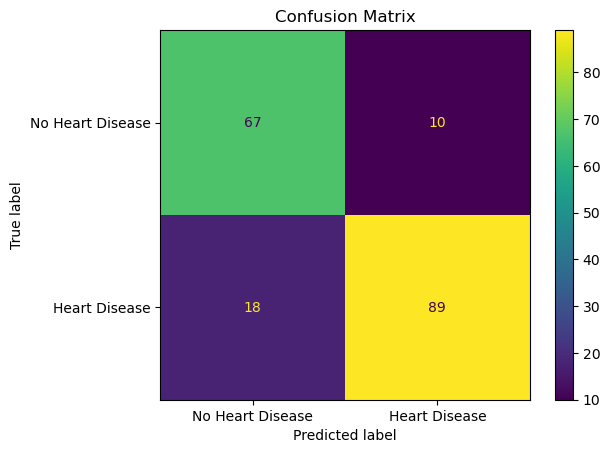

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier  # Import the MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1. Load and Preprocess Data ---
df = pd.read_csv("heartdisease.csv")

# Convert categorical features to numerical
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into training and testing sets
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Define and Train the Feedforward Neural Network (using MLPClassifier) ---
# Create an MLPClassifier object
mlp = MLPClassifier(hidden_layer_sizes=(6,),  # One hidden layer with 6 neurons
                    activation='relu',         # ReLU activation function
                    solver='adam',             # Adam optimizer
                    alpha=0.0001,              # L2 regularization term
                    batch_size='auto',           # Batch size
                    learning_rate_init=0.001,   # Initial learning rate
                    max_iter=500,                # Maximum number of epochs
                    random_state=42)             # Random state for reproducibility

# Train the model
mlp.fit(X_train, y_train)

# --- 3. Make Predictions ---
y_pred = mlp.predict(X_test)

# --- 4. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Regression Metrics:
  MSE:  0.3966
  RMSE: 0.6298
  MAE:  0.4950
  R-squared: 0.3931
  Relative Absolute Error (RAE): 0.7299
  Root Relative Squared Error (RRSE): 0.7790


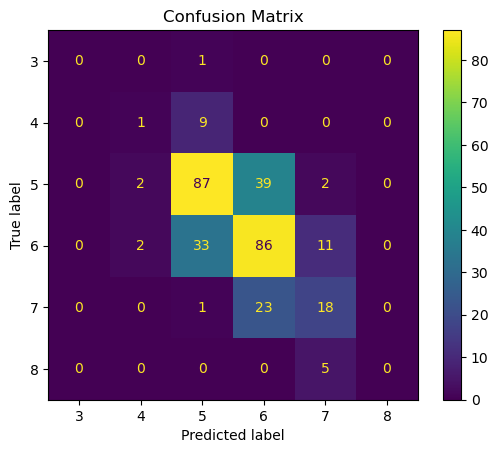

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('winequality.csv')

# Separate features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Neural Network Model ---
# Define and train the model
mlp = MLPRegressor(hidden_layer_sizes=(100,50),  # You can experiment with different numbers of layers and neurons
                   activation='relu',       # Activation function for hidden layers
                   solver='adam',           # Optimizer
                   random_state=42,
                   max_iter=300) # Increase max_iter if the model doesn't converge

mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# --- Regression Metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Remaining Regression Metrics
y_mean = np.mean(y_test)
tss = np.sum((y_test - y_mean) ** 2)  # Total Sum of Squares
rss = np.sum((y_test - y_pred) ** 2)    # Residual Sum of Squares
ess = tss - rss  # Explained Sum of Squares

# Calculate RAE (Relative Absolute Error)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - y_mean))

# Calculate RRSE (Root Relative Squared Error)
rrse = np.sqrt(rss / tss)

print("Regression Metrics:")
print(f"  MSE:  {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R-squared: {r2:.4f}")
print(f"  Relative Absolute Error (RAE): {rae:.4f}")
print(f"  Root Relative Squared Error (RRSE): {rrse:.4f}")

# --- Conversion to Classification for Confusion Matrix ---
# Round predictions to nearest integer
y_pred_class = np.round(y_pred)

# Ensure the predicted values are within the valid range [3, 8]
y_pred_class[y_pred_class < 3] = 3
y_pred_class[y_pred_class > 8] = 8

# --- Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_pred_class, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test))  # Ensure display labels are correct
disp.plot()
plt.title('Confusion Matrix')
plt.show()


--- L1 and L2 Regularization (ElasticNet) ---
  MSE:  0.3902
  RMSE: 0.6247
  MAE:  0.5038
  R-squared: 0.4028
  Relative Absolute Error (RAE): 0.7429
  Root Relative Squared Error (RRSE): 0.7728


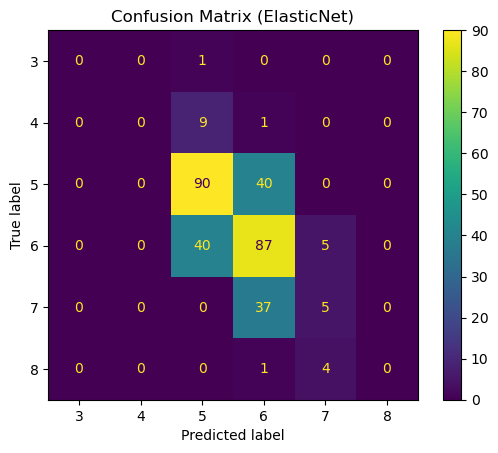


--- L2 Regularization, Dropout with MLPRegressor ---


C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Regression Metrics:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
  R-squared: 0.3750
  MAE:  0.5058
  Root Relative Squared Error (RRSE): 123.6986
  MSE:  0.4084
  RMSE: 0.6391

--- Early Stopping with MLPRegressor ---


C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Regression Metrics:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  R-squared: 0.4243
  MAE:  0.4973
  Root Relative Squared Error (RRSE): 129.0788
  MSE:  0.3762
  RMSE: 0.6134


In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Load the dataset
data = pd.read_csv('winequality.csv')

# Separate features (X) and target (y)
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Scale numerical features
scaler_wine = StandardScaler()
X_scaled = scaler_wine.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_test)
    tss = np.sum((y_test - y_mean) ** 2)
    rss = np.sum((y_test - y_pred - y_test)**2)
    rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - y_mean))
    rrse = np.sqrt(rss / tss)

    print(f"  R-squared: {r2:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  Root Relative Squared Error (RRSE): {rrse:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# --- Model Regularization and Training Functions ---
def train_and_evaluate_mlp(X_train, y_train, X_test, y_test, dropout_rate=0.0, l2_alpha=0.0, early_stopping=False):
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_alpha), input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(dropout_rate),  # Dropout layer added here
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_alpha)),
        keras.layers.Dropout(dropout_rate),  # Dropout layer added here
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    #Set up a call back for early stopping for tensorflow
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

    if early_stopping:
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[callback], verbose=0)

    else:
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    print("\nRegression Metrics:")
    evaluate_regression_model(model, X_test, y_test)

# --- L1 and L2 Regularization using ElasticNet ---
print("\n--- L1 and L2 Regularization (ElasticNet) ---")
en = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)  # l1_ratio controls L1/L2 mix
en.fit(X_train, y_train)

y_pred_en = en.predict(X_test)
#Evaluate regression metrics
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

y_mean_en = np.mean(y_test)
tss_en = np.sum((y_test - y_mean_en) ** 2)
rss_en = np.sum((y_test - y_pred_en) ** 2)
rae_en = np.sum(np.abs(y_test - y_pred_en)) / np.sum(np.abs(y_test - y_mean_en))
rrse_en = np.sqrt(rss_en / tss_en)

print(f"  MSE:  {mse_en:.4f}")
print(f"  RMSE: {rmse_en:.4f}")
print(f"  MAE:  {mae_en:.4f}")
print(f"  R-squared: {r2_en:.4f}")
print(f"  Relative Absolute Error (RAE): {rae_en:.4f}")
print(f"  Root Relative Squared Error (RRSE): {rrse_en:.4f}")

#Create a confusion matrix. This requires converting to classification
y_pred_class_en = np.round(y_pred_en)

y_pred_class_en[y_pred_class_en < 3] = 3
y_pred_class_en[y_pred_class_en > 8] = 8

cm_en = confusion_matrix(y_test, y_pred_class_en, labels=np.unique(y_test))
disp_en = ConfusionMatrixDisplay(confusion_matrix=cm_en, display_labels=np.unique(y_test))
disp_en.plot()
plt.title('Confusion Matrix (ElasticNet)')
plt.show()

# --- L2 Regularization (Weight Decay) with MLPRegressor and Dropout ---
print("\n--- L2 Regularization, Dropout with MLPRegressor ---")
train_and_evaluate_mlp(X_train, y_train, X_test, y_test, dropout_rate=0.3, l2_alpha=0.001)

# --- Early Stopping with MLPRegressor ---
print("\n--- Early Stopping with MLPRegressor ---")
train_and_evaluate_mlp(X_train, y_train, X_test, y_test, early_stopping=True)